<a href="https://colab.research.google.com/github/Madhuanabala/breast-cancer/blob/model-building/model_building_lazy_prredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install lazypredict

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
import warnings
warnings.filterwarnings("ignore")

In [47]:
import pandas as pd
df=pd.read_csv('/content/combined_dataset_ordered.csv')
df

,Unnamed: 0,EStateFP9,EStateFP12,EStateFP16,EStateFP18,EStateFP19,EStateFP21,EStateFP24,EStateFP25,EStateFP29,...,KRFP3436,KRFP3455,KRFP3697,KRFP3712,KRFP3727,KRFP3730,KRFP3731,KRFP3733,KRFP3788,KRFP3789
0,0,1,1,1,0,1,0,1,0,0,...,1,1,0,1,1,1,0,1,1,1
1,2,1,1,1,0,1,0,1,0,0,...,1,1,0,1,1,1,0,1,1,1
2,3,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,1,1,1,0,1,0,1,0,0,...,1,1,0,1,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,1804,1,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1813,1805,1,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1814,1809,1,1,0,1,0,0,1,1,1,...,0,0,0,0,0,1,0,0,1,1
1815,1812,1,1,1,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [48]:
df.isna().sum()
df.dropna(inplace=True)

In [49]:
X = df.drop('bioactivity_class', axis=1)
Y = df['bioactivity_class']

In [50]:
Y = df.bioactivity_class
Y

,bioactivity_class
0,1
1,1
2,0
3,1
4,1
...,...
1812,0
1813,1
1814,0
1815,0


In [51]:
X.shape

(1817, 211)

In [52]:
Y.shape

(1817,)

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y,random_state=100)

In [54]:
X_train.shape, Y_train.shape

((1453, 211), (1453,))

In [55]:
X_test.shape, Y_test.shape

((364, 211), (364,))

In [56]:
print(X.describe())

       Unnamed: 0  EStateFP9  EStateFP12  EStateFP16  EStateFP18  EStateFP19  \
count     1817.00    1817.00     1817.00     1817.00     1817.00     1817.00   
mean       908.00       0.82        0.87        0.83        0.47        0.36   
std        524.67       0.38        0.34        0.38        0.50        0.48   
min          0.00       0.00        0.00        0.00        0.00        0.00   
25%        454.00       1.00        1.00        1.00        0.00        0.00   
50%        908.00       1.00        1.00        1.00        0.00        0.00   
75%       1362.00       1.00        1.00        1.00        1.00        1.00   
max       1816.00       1.00        1.00        1.00        1.00        1.00   

       EStateFP21  EStateFP24  EStateFP25  EStateFP29  ...  KRFP3436  \
count     1817.00     1817.00     1817.00     1817.00  ...   1817.00   
mean         0.12        0.38        0.20        0.34  ...      0.20   
std          0.32        0.49        0.40        0.47  ...     

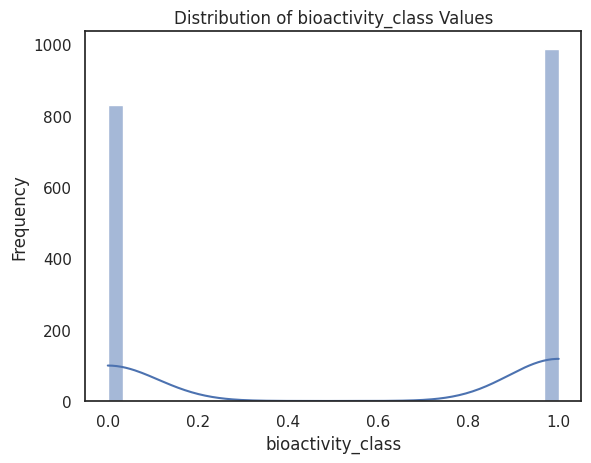

In [57]:
sns.histplot(Y, bins=30, kde=True)
plt.xlabel('bioactivity_class')
plt.ylabel('Frequency')
plt.title('Distribution of bioactivity_class Values')
plt.show()

In [63]:
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, Y_train, Y_test)
models

 97%|█████████▋| 31/32 [00:05<00:00,  8.13it/s]

[LightGBM] [Info] Number of positive: 789, number of negative: 664
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1432
[LightGBM] [Info] Number of data points in the train set: 1453, number of used features: 211
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.543014 -> initscore=0.172484
[LightGBM] [Info] Start training from score 0.172484


100%|██████████| 32/32 [00:05<00:00,  5.50it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.91,0.91,0.91,0.91,0.29
RandomForestClassifier,0.91,0.90,0.90,0.91,0.48
ExtraTreesClassifier,0.90,0.90,0.90,0.90,0.44
BaggingClassifier,0.88,0.88,0.88,0.88,0.31
SVC,0.86,0.85,0.85,0.86,0.30
QuadraticDiscriminantAnalysis,0.86,0.85,0.85,0.86,0.14
KNeighborsClassifier,0.85,0.85,0.85,0.85,0.06
ExtraTreeClassifier,0.85,0.85,0.85,0.85,0.03
NuSVC,0.85,0.84,0.84,0.85,0.35


Model Label Spreading could not be evaluated. Error: Input contains NaN.
Model Label Propagation could not be evaluated. Error: Input contains NaN.
Model LightGBM could not be evaluated. Error: Do not support special JSON characters in feature name.


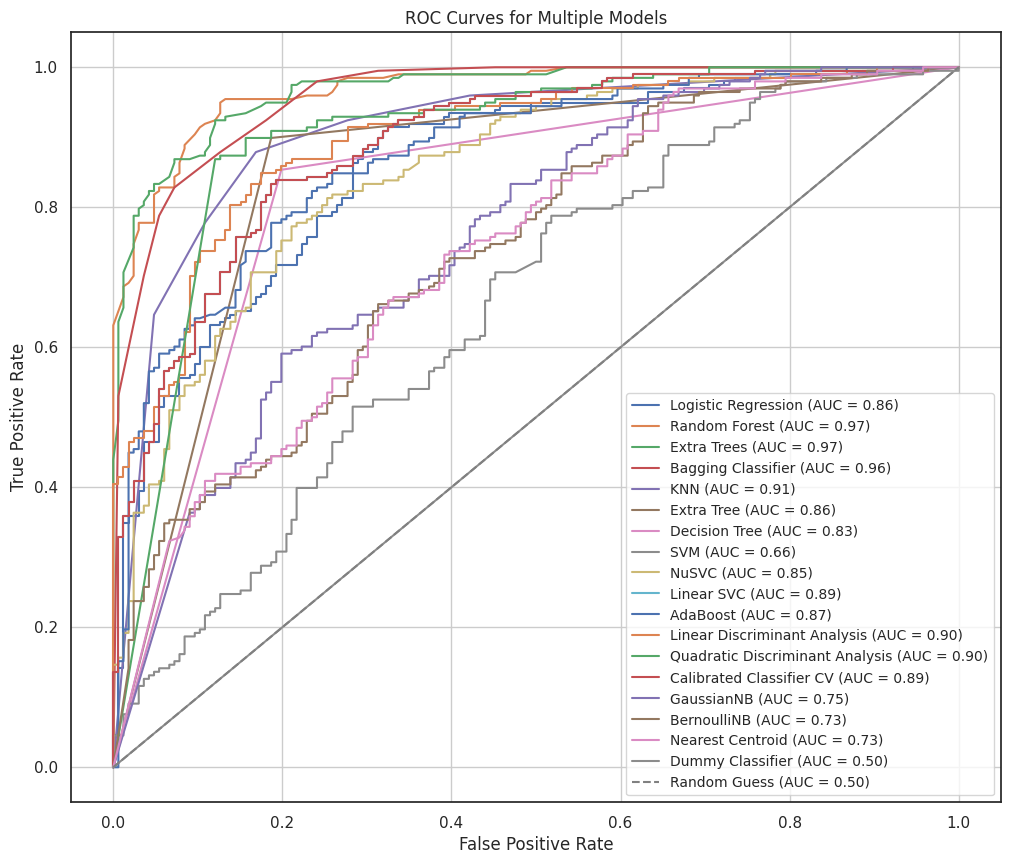

In [67]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

# Import classifiers
from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.linear_model import (
    LogisticRegression,
    RidgeClassifier,
    RidgeClassifierCV,
    SGDClassifier,
    PassiveAggressiveClassifier,
    Perceptron,
)
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
)
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import NearestCentroid
from sklearn.dummy import DummyClassifier
from sklearn.semi_supervised import LabelSpreading, LabelPropagation
from lightgbm import LGBMClassifier

# Define models to evaluate
models_to_evaluate = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "Bagging Classifier": BaggingClassifier(),
    "KNN": KNeighborsClassifier(),
    "Extra Tree": ExtraTreeClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),
    "NuSVC": NuSVC(probability=True),
    "Linear SVC": CalibratedClassifierCV(LinearSVC(), cv=5),
    "Ridge Classifier": RidgeClassifier(),
    "Ridge Classifier CV": RidgeClassifierCV(),
    "AdaBoost": AdaBoostClassifier(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(),
    "Calibrated Classifier CV": CalibratedClassifierCV(),
    "Label Spreading": LabelSpreading(),
    "Label Propagation": LabelPropagation(),
    "GaussianNB": GaussianNB(),
    "BernoulliNB": BernoulliNB(),
    "SGD Classifier": SGDClassifier(),
    "Passive Aggressive": PassiveAggressiveClassifier(),
    "Perceptron": Perceptron(),
    "Nearest Centroid": NearestCentroid(),
    "Dummy Classifier": DummyClassifier(),
    "LightGBM": LGBMClassifier(),
}

# Initialize a figure for the ROC plots
plt.figure(figsize=(12, 10))

# Binarize the labels for ROC curve calculation (ensure y is binary: [0, 1])
Y_bin = label_binarize(Y_test, classes=[0, 1])

# Loop through each model
for model_name, model in models_to_evaluate.items():
    try:
        # Train the model
        model.fit(X_train, Y_train)
        # Predict probabilities
        Y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
        if Y_proba is not None:
            # Calculate ROC curve
            fpr, tpr, _ = roc_curve(Y_test, Y_proba)
            # Calculate the AUC
            roc_auc = auc(fpr, tpr)
            # Plot the ROC curve
            plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")
    except Exception as e:
        print(f"Model {model_name} could not be evaluated. Error: {e}")

# Plot random chance line
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", label="Random Guess (AUC = 0.50)")
# Customize the plot
plt.title("ROC Curves for Multiple Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right", fontsize='small')
plt.grid()
plt.show()

In [70]:
from sklearn import metrics
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
y_pred = rf.predict(X_test)
print('Evaluation Metrics – Random Forest:')
print('Accuracy: ' + str(metrics.accuracy_score(Y_test, Y_pred)))
print('F1 Score: ' + str(metrics.f1_score(Y_test, Y_pred, average='macro')))

Evaluation Metrics – Random Forest:
Accuracy: 0.9065934065934066
F1 Score: 0.9054516562767387
